In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cooler
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from HICT_Patterns.hict.patterns.help_functions import get_genome_coords_single, calculate_diag_means
local_path = 'D:/Study/HICT/HICT_Patterns/'

### Visualisation of results

C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3939699894.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[((results['bp_1']<(c.chromsizes[chr_number])//res_result) & (results['bp_2']<(c.chromsizes[chr_number])//res_result))]


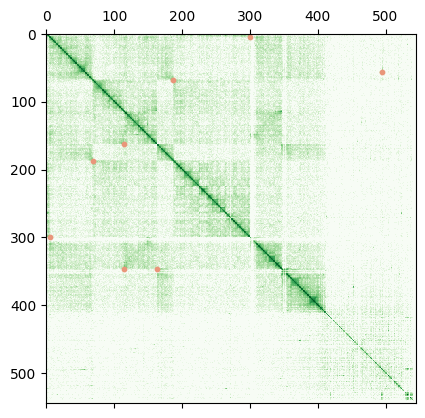

In [36]:
from matplotlib.patches import Rectangle

resolution = 50000
res_result = 1
c = cooler.Cooler(f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[0])
chr_number = 0
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/ARAB_vs_Coluzzii/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}result.csv')
#results = results[results.chr == 0]
#results = results[results.chr_y == 0]

results = results[((results['bp_1']<(c.chromsizes[chr_number])//res_result) & (results['bp_2']<(c.chromsizes[chr_number])//res_result))]
#results = results[results.label != 'negative']
#results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(mat_balanced)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=10, c='#E9967A')
for index, row in results.iterrows():
    ax.add_patch(Rectangle(((row.bp_1-24)*res_result//resolution, (row.bp_2-24)*res_result//resolution), 48*res_result//resolution, 48*res_result//resolution, fill=False, lw=0.5))

plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#E9967A')

#plt.savefig('stage5.png', dpi=500)

C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3969428044.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[((results['bp_1']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_1']>c.chromsizes[chr_number-1]//res_result)) &
C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3969428044.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((results['bp_2']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_2']>c.chromsizes[chr_number-1]//res_result))]
C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3969428044.py:21:

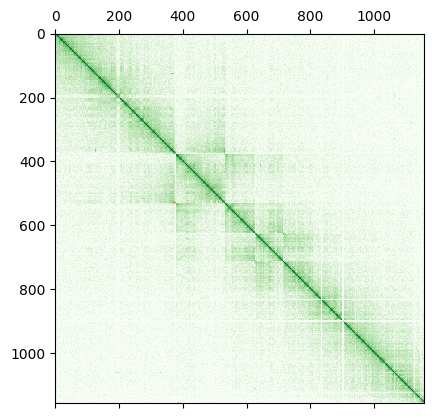

In [37]:
resolution = 50000
res_result = 1

c = cooler.Cooler(f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[1])
chr_number = 1
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log10(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}result.csv')
#results = results[results.chr == 1]
#results = results[results.chr_y == 1]
results = results[((results['bp_1']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_1']>c.chromsizes[chr_number-1]//res_result)) &
                  ((results['bp_2']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_2']>c.chromsizes[chr_number-1]//res_result))]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]//res_result
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]//res_result
#results = results[results.label != 'negative']
#results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(matrix)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#0000FF')

#plt.savefig('output.png', dpi=1000)

C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3304259196.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[((results['bp_1']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result)) &
C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3304259196.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((results['bp_2']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result))]
C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3304259196.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

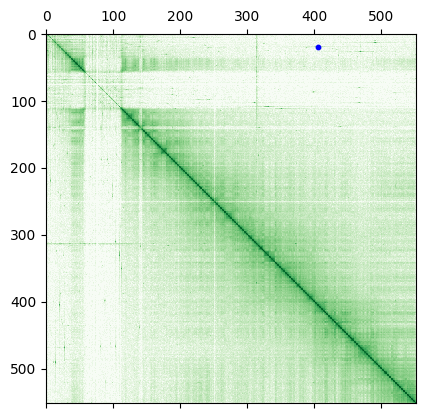

In [29]:
resolution = 100000
res_result = 1

c = cooler.Cooler(f'{local_path}data\ZANU_ARAB/Zanu_Arab_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[2])
chr_number = 2
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log10(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}result.csv')
results = results[((results['bp_1']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result)) &
                  ((results['bp_2']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result))]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]//res_result - c.chromsizes[chr_number-2]//res_result
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]//res_result - c.chromsizes[chr_number-2]//res_result
results = results[results.label != 'negative']
results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(matrix)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#0000FF')

In [47]:
resolution = 1000
c = cooler.Cooler(f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
answers = pd.read_csv(f'{local_path}data/ARAB_vs_Coluzzii/proof_patterns.csv')
answers = answers[answers.label != 'negative']
answers['start_res'] = answers.start // resolution
answers['end_res'] = answers.end // resolution
answers['bp_1'] = get_genome_coords_single(zip(answers['chr'], answers['start_res']), c.chromnames, c.chromsizes, resolution)
answers['bp_2'] = get_genome_coords_single(zip(answers['chr'], answers['end_res']), c.chromnames, c.chromsizes, resolution)
results = pd.read_csv(f'{local_path}result.csv')
#results = results[results.label != '+-']
chr_size_sum = c.chromsizes[0]+c.chromsizes[1]+c.chromsizes[2]
results = results[results.bp_1<chr_size_sum]
results = results[results.bp_2<chr_size_sum]
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

tp = 0
fn = len(answers)*2
for index, row in results.iterrows():
    found_x = False
    found_y = False
    for x in answers.bp_1:
        if abs(x-row.bp_2) <= 20:
            found_x = True
    for y in answers.bp_2:
        if abs(y-row.bp_1) <= 20:
            found_y = True
    if found_x:
        tp+=1
        fn-=1
    if found_y:
        tp+=1
        fn-=1

print(tp)  

4


C:\Users\vit\AppData\Local\Temp\ipykernel_19080\3618858442.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chr_size_sum = c.chromsizes[0]+c.chromsizes[1]+c.chromsizes[2]


In [39]:
results

,bp_1,bp_2,label
0,9385,3444,--
1,15000,246,+-
2,24789,2848,+-


In [40]:
answers

,chr,start,end,label,start_res,end_res,bp_1,bp_2
0,X,3439000,9380000,inversion,3439,9380,3439,9380
1,X,5747000,8169000,duplication,5747,8169,5747,8169
2,X,5748000,17330000,deletion,5748,17330,5748,17330
3,X,8171000,17333000,duplication,8171,17333,8171,17333
4,X,262000,15002000,inversion,262,15002,262,15002
5,2R,18906000,26624000,inversion,18906,26624,46118,53836
6,2R,31304000,35707000,inversion,31304,35707,58516,62919


In [48]:
precision = tp/(len(results)*2)
recall = tp/(tp+fn)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:',2*(precision*recall)/(precision+recall))

Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1 score: 0.4


In [50]:
print(c.chromnames)

['X', '2R', '2L', '3R', '3L', 'scaffold_11', 'scaffold_12', 'scaffold_14', 'scaffold_16', 'scaffold_17', 'scaffold_19', 'scaffold_20', 'scaffold_21', 'scaffold_22', 'scaffold_23', 'scaffold_24', 'scaffold_25', 'scaffold_26', 'scaffold_27', 'scaffold_28', 'scaffold_29', 'scaffold_30', 'scaffold_31', 'scaffold_32', 'scaffold_33', 'scaffold_34', 'scaffold_35', 'scaffold_36', 'scaffold_37', 'scaffold_38', 'scaffold_39', 'scaffold_40', 'scaffold_41', 'scaffold_42', 'scaffold_43', 'scaffold_44', 'scaffold_45', 'scaffold_46', 'scaffold_47', 'scaffold_48', 'scaffold_49', 'scaffold_50', 'scaffold_51', 'scaffold_52', 'scaffold_53', 'scaffold_54', 'scaffold_55', 'scaffold_56', 'scaffold_57', 'scaffold_58', 'scaffold_59', 'scaffold_60', 'scaffold_61', 'scaffold_62', 'scaffold_63', 'scaffold_64', 'scaffold_65', 'scaffold_66', 'scaffold_67', 'scaffold_68', 'scaffold_69', 'scaffold_70', 'scaffold_71', 'scaffold_72', 'scaffold_73', 'scaffold_74', 'scaffold_75', 'scaffold_76', 'scaffold_77', 'scaffold_

In [54]:
resolution = 5000
c = cooler.Cooler(f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[1])
chr_number = 1
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/ARAB_vs_Coluzzii/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}results/result_arab_coluzzii.csv')
results = results[(results['bp_1']<(c.chromsizes[chr_number]+c.chromsizes[chr_number-1])) & (results['bp_1']>c.chromsizes[chr_number-1])]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

for x, y, label in zip(results.bp_1, results.bp_2, results.label):
    point_area = matrix[x - 50:x + 50,y - 50:y + 50]
    plt.imsave(f'{local_path}/results/proof_arab_coluzzii_{x}_{y}_{label}.png',
                                   point_area, cmap='Greens')

C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[(results['bp_1']<(c.chromsizes[chr_number]+c.chromsizes[chr_number-1])) & (results['bp_1']>c.chromsizes[chr_number-1])]
C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]
C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

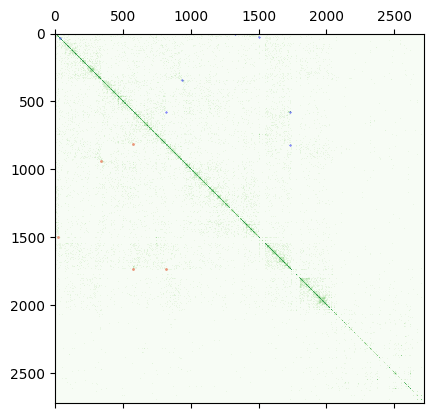

In [24]:
resolution = 10000
c = cooler.Cooler(f'{local_path}data/ARAB_vs_Coluzzii/ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[0])
chr_number = 0
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/ARAB_vs_Coluzzii/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}results/ARAB_vs_Coluzzii.CNN_SVs.5K_combined.txt', sep='\t')
results = results[results['chrom1']=='X']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(mat_balanced)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.pos2//resolution, results.pos1//resolution,s=.1, c='#0000FF')

plt.savefig('output.png', dpi=1000)

In [25]:
results

,chrom1,pos1,chrom2,pos2,++,+-,-+,--
0,X,270000,X,15015000,1.000000e+00,1.534000e-21,8.542000e-27,1.000000e+00
1,X,50000,X,13260000,6.512000e-27,9.875000e-01,1.000000e+00,2.018000e-27
2,X,3430000,X,9375000,3.502000e-02,4.320000e-25,2.291000e-27,1.000000e+00
3,X,5745000,X,17330000,2.225000e-23,5.319000e-15,1.000000e+00,1.381000e-19
4,X,5740000,X,8165000,1.000000e+00,2.276000e-23,1.869000e-18,4.308000e-19
5,X,8170000,X,17330000,2.090000e-15,8.589000e-15,1.766000e-19,1.000000e+00
6,X,355000,X,405000,3.378000e-19,9.996000e-01,6.782000e-17,3.018000e-17


In [34]:
resolution = 1000
c = cooler.Cooler(f'{local_path}data\ZANU_ARAB/Zanu_Arab_4DN.mcool::/resolutions/{resolution}')
answers = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
#answers = answers[answers.label != 'copy_gain']
answers['start_res'] = answers.start // resolution
answers['end_res'] = answers.end // resolution
answers['bp_1'] = get_genome_coords_single(zip(answers['chr'], answers['start_res']), c.chromnames, c.chromsizes, resolution)
answers['bp_2'] = get_genome_coords_single(zip(answers['chr'], answers['end_res']), c.chromnames, c.chromsizes, resolution)
results = pd.read_csv(f'{local_path}results/Zanu_Arab.CNN_SVs.5K_combined.txt', sep='\t')
results['bp_1'] = get_genome_coords_single(zip(results['chrom1'], results['pos1']), c.chromnames, c.chromsizes, resolution)
results['bp_2'] = get_genome_coords_single(zip(results['chrom1'], results['pos2']), c.chromnames, c.chromsizes, resolution)
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

tp = 0
fn = len(answers)*2
for index, row in results.iterrows():
    found_x = False
    found_y = False
    for x in answers.bp_2:
        if abs(x-row.bp_2) <= 5:
            found_x = True
    for y in answers.bp_1:
        if abs(y-row.bp_1) <= 5:
            found_y = True
    if found_x:
        tp+=1
        fn-=1
    if found_y:
        tp+=1
        fn-=1

print(tp)

6


In [35]:
precision = tp/(len(results)*2)
recall = tp/(tp+fn)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:',2*(precision*recall)/(precision+recall))

Precision: 0.2727272727272727
Recall: 0.5
F1 score: 0.3529411764705882
